# Project Final Submission Template

### Step 1a: Planning 
#### Identify the information in the file your program will read

Describe (all) the information that is available. Be sure to note any surprising or unusual features. (For example, some information sources have missing data, which may be blank or flagged using values like -99, NaN, or something else.)

<font color="blue">
    
The csv file that I will read, "hate_crime.csv", has 12 columns:
  * share_population_with_high_school_degree: the share of adults with a high-school degree (25 or older)
  * avg_hatecrimes_per_100k_fbi: the average annual hate crimes per 100,000 population reported by FBI - missing for Hawaii
  * state: the state name
  * median_household_income: median household income in USD
  * gini_index: Gini Index
  * share_unemployed_seasonal: share of the population that is unemployed (seasonally adjusted)
  * 
share_population_in_metro_area: sShare of the population that lives in metropolitan area
  * share_non_citizen: share of the population that is not U.S. citizen - missing data for South Dakota
  * share_white_poverty: share of white residents who are living in poverty
  * share_non_white: share of the non-white population
  * share_voters_voted_trump: share of 2016 U.S. presidential voters who voted for Donald Trump
  * hate_crimes_per_100k_splc: hate crimes per 100,000 population, Southern Poverty Law Center - missing data for Hawaii, North Dakota, South Dakota and Wyoming
    

</font>

### Step 1b: Planning 
#### Brainstorm ideas for what your program will produce
#### Select the idea you will build on for subsequent steps

You must brainstorm at least three ideas for graphs or charts that your program could produce and choose the one that you'd like to work on. You can choose between a line chart, histogram, bar chart, scatterplot, or pie chart.

If you would like to change your project idea from what was described in the proposal, you will need to get permission from your project TA. This is intended to help ensure that your new project idea will meet the requirements of the project. Please see the project proposal for things to be aware of when communicating with your project TA.

<font color="blue">
    
Idea 1: bar graph that compares the average hate crime among high school education share categories (0-85: low, 85-90: med, 90-95: high, 95-100: very high). The categories were decided based on the average share of high school education which is 86%, and most of the data ranges between 80-95.\

Idea 2: bar graph that compares average hate crime to shares of trump voters (0-25: low, 25-50: med, 50-75: high, 75-100: very high). The average trump voters share is 50% and it mostly ranges 40%-60%.

Idea 3: scatterplot that compares the average median household income of US regions division (West, Midwest, South, and Northeast) versus the average hate crime in these states.

</font>

### Step 1c: Planning 
#### Write or draw examples of what your program will produce

You must include an image that shows what your chart or plot will look like. You can insert an image using the Insert Image command near the bottom of the Edit menu.

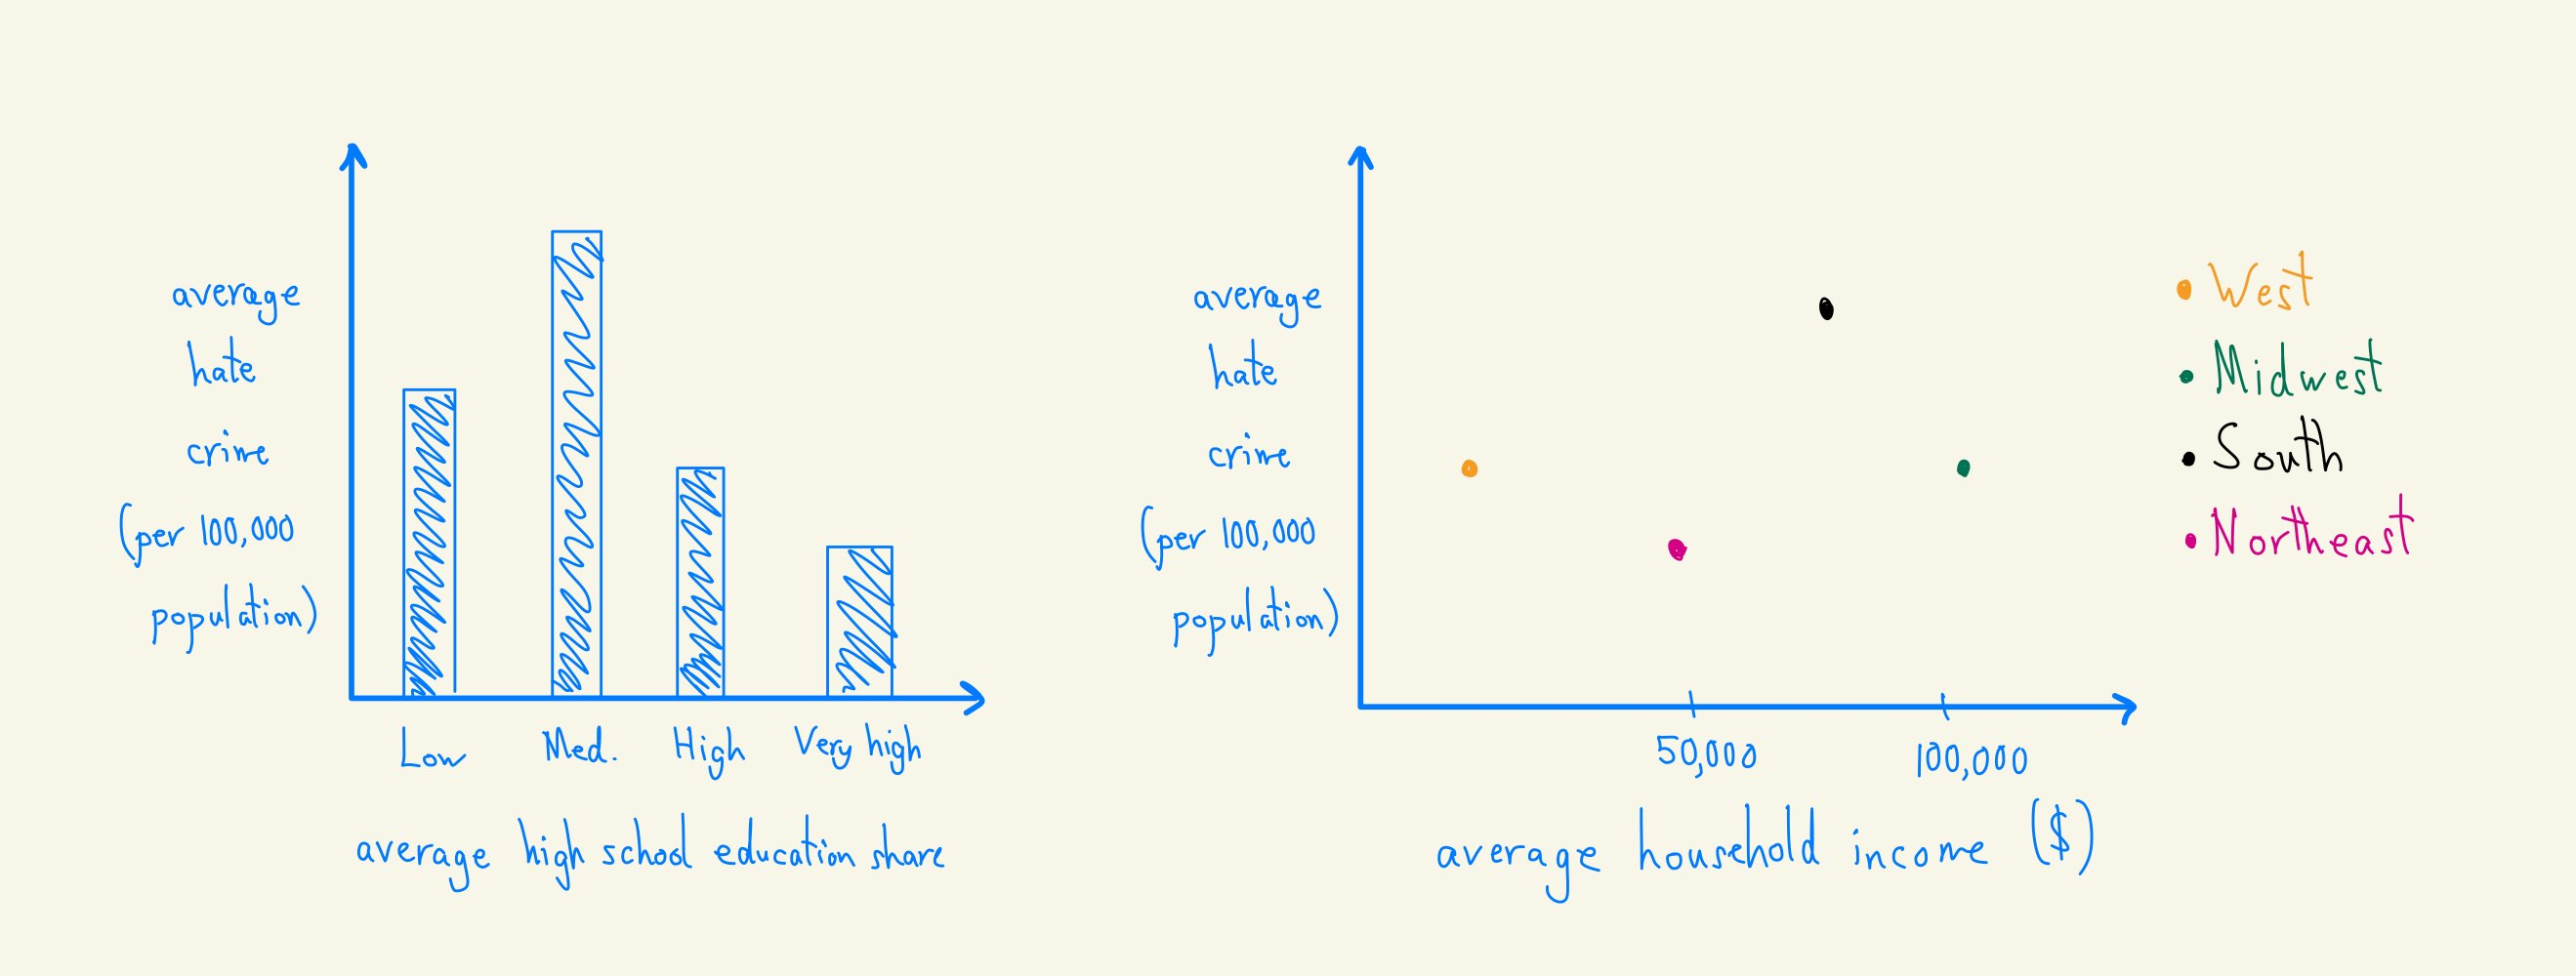

### Step 2a: Building
#### Document which information you will represent in your data definitions

Before you design data definitions in the code cell below, you must explicitly document here which information in the file you chose to represent and why that information is crucial to the chart or graph that you'll produce when you complete step 2c.

<font color="blue">

To plot average hate crime versus average share of high school education, I will focus on 3 collumns:
  * share_population_with_high_school_degree: will be used to classify each state as low, med, high, or very high
  * avg_hatecrimes_per_100k_fbi: used to calculate and find the average hatecrimes
  * state: label to verify and filter any state with needed

</font>

#### Design data definitions

In [1]:
from cs103 import *
import csv
from typing import NamedTuple, List
from enum import Enum

In [2]:
##################
# Data Definitions

EducationCategory = Enum('EducationCategory', ['low', 'med', 'high', 'very_high'])
#interp. category of high_school_share based on the percentage of people with high school degrees in each states, divided into low(0-85), med(85-90), high(90-95), and very high(95-100)
# examples are redundant for enumeration

# template based on enumeration
@typecheck
def fn_for_education_category(ec: EducationCategory) -> ...:
    if ec == EducationCategory.low:
        return ...
    elif ec == EducationCategory.med:
        return ...
    elif ec == EducationCategory.high:
        return ...
    elif ec == EducationCategory.very_high:
        return ...


# List[EducationCategory]
# interp. a list of Categories for the percentage of people with a high school degree
LOEC0 = []
LOEC1 = [EducationCategory.low, EducationCategory.med, EducationCategory.high, EducationCategory.very_high]

# template based on arbitrary-sized and the reference rule
@typecheck
def fn_for_loec(loec: List[EducationCategory]) -> ...:
    # description of the acc
    acc = ... # type: ...
    for ec in loec:
        acc = ...(acc, fn_for_education_category(ec))
    return ...(acc)


StateHateCrime = NamedTuple('StateHateCrime', [('state_name', str),
                                     ('hate_crime_per_100k', float),  # range [0, ...]
                                     ('high_school_share', float),     # range [0, 1]
                                     ('high_school_share_cat', EducationCategory)
                                    ])
# interp. StateHateCrime data that has state_name, average hate crime per 100,000 population (hate_crime_per_100k), 
# and the fraction of the population with a high school degree (high_school_share), and high school education category

SHC1 = StateHateCrime('Alabama', 1.806410489, 0.821, EducationCategory.low)
SHC2 = StateHateCrime('California', 2.397985899, 0.806, EducationCategory.low)
SHC3 = StateHateCrime('Wisconsin', 1.121944651, 0.898, EducationCategory.med)

# template based on compound and reference rule
@typecheck
def fn_for_state_hate_crime(shc: StateHateCrime) -> ...: 
    return ...(shc.state_name,
               shc.hate_crime_per_100k,
               shc.high_school_share,
               fn_for_education_category(shc.high_school_share_cat))


# List[State]
# interp. a list of state data

LOSHC0 = []
LOSHC1 = [SHC1, SHC2, SHC3]

# template based on arbitrary-sized and the reference rule
@typecheck
def fn_for_loshc(loshc: List[StateHateCrime]) -> ...:
    # description of the acc
    acc = ... # type: ...
    for shc in loshc:
        acc = ...(acc, fn_for_state_hate_crime(shc))
    return ...(acc)


def high_school_share_category(share: float) -> EducationCategory: 
    """
    returns the category based on share value [low(0-85), med(85-90), high(90-95), and very high(95-100)]. 
    The higher category will be returned if the share value is on the edge of both categories.
    """
    # return EducationCategory.low #stub
    # template from non-atomic distinct and reference rule
    
    if share < 0.85:
        return EducationCategory.low
    elif 0.85 <= share < 0.90:
        return EducationCategory.med
    elif 0.90 <= share < 0.95:
        return EducationCategory.high
    elif 0.95 <= share <= 1.0:
        return EducationCategory.very_high

start_testing()
expect(high_school_share_category(0.0), EducationCategory.low)
expect(high_school_share_category(0.85), EducationCategory.med)
expect(high_school_share_category(0.921), EducationCategory.high)
expect(high_school_share_category(0.964), EducationCategory.very_high)
expect(high_school_share_category(1.0), EducationCategory.very_high)
summary()

5 of 5 tests passed


### Step 2b and 2c: Building
#### Design a function to read the information and store it as data in your program
#### Design functions to analyze the data


Complete these steps in the code cell below. You will likely want to rename the analyze function so that the function name describes what your analysis function does.

Unless approved by your project TA, you **cannot** use libraries such as `numpy` or `pandas`. The project is meant as a way for you to demonstrate your knowledge of the learning goals in this course. While it is convinent to use external libraries, it will do all the work and will not help us gauge your mastery of the concepts.

You also cannot use built in list functions (e.g., `sum` or `average`) when writing code to do your substantial computation. Normally we encourage you to make use of what is already available but in this case, the final project involves demonstrating skills from class (e.g., how to work with a list). Using pre-built functions for this does not enable you to demonstrate what you know.

If you wish to change your project idea, you must **first** obtain permission from your TA. When contacting your TA, please provide a valid reason for why you want to change your project. Each time you change your topic idea, your TA will have to evaluate it to see if it will meet all of the project requirements. This is non-trivial task during one of the busiest times of the semester. As such, the deadline for project idea changes will be 3 business days before the deadline. Note that the deliverable deadline will not be extended and there is no compensation for the time you spent on the previous idea.

<font color="blue">
helper functions to find the average hate crime of each category of high school share
</font>

In [3]:
import matplotlib.pyplot as plt

@typecheck
def avg_of_categories(loshc: List[StateHateCrime], categories: List[EducationCategory]) -> List[float]:
    """
    returns the average of each category as a list. 
    """
    # return [] #stub
    # template from List[StateHateCrime] and reference rule
    
    # averages is the list of averages
    averages = [] # type: List[float]
    for category in categories:
        averages.append(avg_per_category(loshc, category))
    return averages


@typecheck
def avg_per_category(loshc: List[StateHateCrime], category: EducationCategory) -> float:
    """
    returns the average hate crime of the category from the list of states.
    """
    # return 0.0 #stub
    # template based on composition

    #step 1: return list of states from the category
    list_states_of_category = states_of_given_category(loshc, category)

    #step 2: return the average of hate crime from the list_states_of_category
    average = average_hate_crime(list_states_of_category)

    return average



@typecheck
def states_of_given_category(loshc: List[StateHateCrime], category: EducationCategory) -> List[StateHateCrime]:
    """
    returns all the States from the given category.
    """
    # return [] #stub
    # template from List[StateHateCrime] and reference rule

    # list of States from the category so far
    acc = [] # type: List[StateHateCrime]
    for shc in loshc:
        if state_from_category(shc, category):
            acc.append(shc)
    return acc


@typecheck
def state_from_category(shc: StateHateCrime, category: EducationCategory) -> bool:
    """
    returns true if the state's high_school_share_cat matches the given category. returns false otherwise.
    """
    # return False #stub
    # template from StateHateCrime and additional parameter
    return shc.high_school_share_cat == category
    

@typecheck
def average_hate_crime(loshc:List[StateHateCrime]) -> float:
    """
    returns the average hate crime of all the given states.
    """
    # return 0.0 #stub
    # template from List[StateHateCrime]

    # sum is the total of hate crime stats
    sum = 0 #type: float

    # count is the number of states seen so far
    count = 0 #type: int

    for shc in loshc:
        sum += shc.hate_crime_per_100k
        count += 1
    if count == 0:
        return 0
    return sum/count


start_testing()
expect(avg_of_categories([SHC1, SHC2, SHC3], [EducationCategory.low, EducationCategory.med, EducationCategory.high, EducationCategory.very_high]), 
       [(1.806410489+2.397985899)/2, 1.121944651, 0, 0])
expect(avg_of_categories([], []),[])
expect(avg_of_categories([], [EducationCategory.low, EducationCategory.med, EducationCategory.high]), [0, 0, 0])
summary()

start_testing()
expect(avg_per_category([SHC1, SHC2, SHC3], EducationCategory.low), (1.806410489+2.397985899)/2)
expect(avg_per_category([SHC1, SHC2, SHC3], EducationCategory.high), 0)
summary()

start_testing()
expect(states_of_given_category([SHC1, SHC2, SHC3], EducationCategory.low), [SHC1, SHC2])
expect(states_of_given_category([SHC1, SHC2, SHC3], EducationCategory.high), [])
summary()

start_testing()
expect(state_from_category(SHC1, EducationCategory.low), True)
expect(state_from_category(SHC1, EducationCategory.med), False)
expect(state_from_category(SHC3, EducationCategory.med), True)
summary()

start_testing()
expect(average_hate_crime([SHC1]), 1.806410489)
expect(average_hate_crime([]), 0)
expect(average_hate_crime([SHC1, SHC2, SHC3]), (1.806410489+2.397985899+1.121944651)/3)
summary()

3 of 3 tests passed
2 of 2 tests passed
2 of 2 tests passed
3 of 3 tests passed
3 of 3 tests passed


<font color="blue">
    helper functions for the graph, including labels for categories, and produce_num_sequence for middle of bars.
</font>

In [4]:
@typecheck
def produce_category_labels(loec: List[EducationCategory]) -> List[str]:
    """
    produce appropriate labels for the categories of people with high school degrees based on what
    possible labels are low, med, high, and very high.
    """
    # return [] #stub
    # template from List[EducationCategory] and reference rule

    # acc is list of labels
    labels = [] #type: List[str]

    for ec in loec:
        labels.append(produce_label(ec))
    return labels


@typecheck
def produce_label(ec: EducationCategory) -> str:
    """
    return the enumeration of EducationCategory as string.
    """
    # return "" #stub
    # template from EducationCategory

    if ec == EducationCategory.low:
        return "Low (0-85%)"
    elif ec == EducationCategory.med:
        return "Medium (85-90%)"
    elif ec == EducationCategory.high:
        return "High (90-95%)"
    elif ec == EducationCategory.very_high:
        return "Very high (95-100%)"


@typecheck
def produce_num_sequence(values: List[EducationCategory], initial: float, gap: float) -> List[float]:
    """
    Produce a list of numbers like [initial, initial + gap, initial + 2*gap, ...] of the same
    length as values, e.g., to give alignment coordinates for a plot. The number
    of numbers in the list is equal to len(values). The first value is initial. The gap between values
    is gap.
    
    E.g., [5,15,25,35,45,55,65,75] for 8 values, initial == 5, and gap == 10.
    """
    #return []  #stub
    # Template from List[float] with two additional parameters
    
    # nums is the numbers for the values seen so far
    nums = []  # type: List[int]
    
    # next_num is the next number to use
    next_num = initial
    
    for val in values:
        nums.append(next_num)
        next_num = next_num + gap
    return nums


start_testing()
expect(produce_category_labels([]), [])
expect(produce_category_labels([EducationCategory.low, EducationCategory.med]), ["Low (0-85%)", "Medium (85-90%)"])
expect(produce_category_labels(LOEC1), ["Low (0-85%)", "Medium (85-90%)", "High (90-95%)", "Very high (95-100%)"])
summary()

start_testing()
expect(produce_label(EducationCategory.low), "Low (0-85%)")
expect(produce_label(EducationCategory.med), "Medium (85-90%)")
expect(produce_label(EducationCategory.high), "High (90-95%)")
expect(produce_label(EducationCategory.very_high), "Very high (95-100%)")
summary()

3 of 3 tests passed
4 of 4 tests passed


<font color="blue">
    display_bar_chart function for analyzing and producing the main graph.
</font>

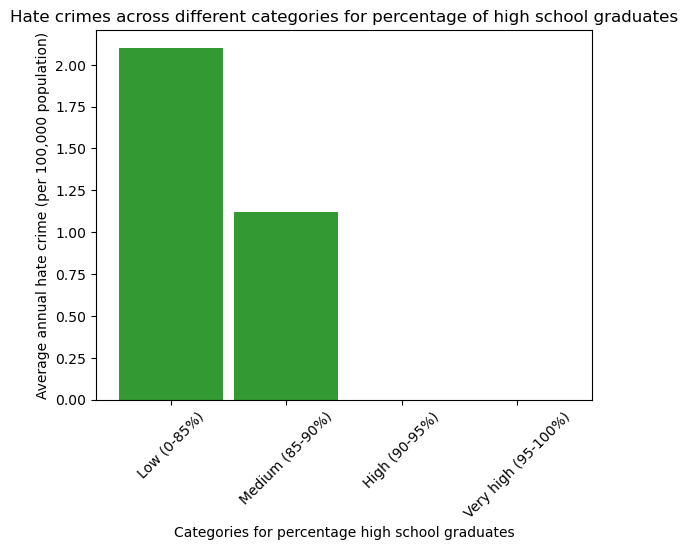

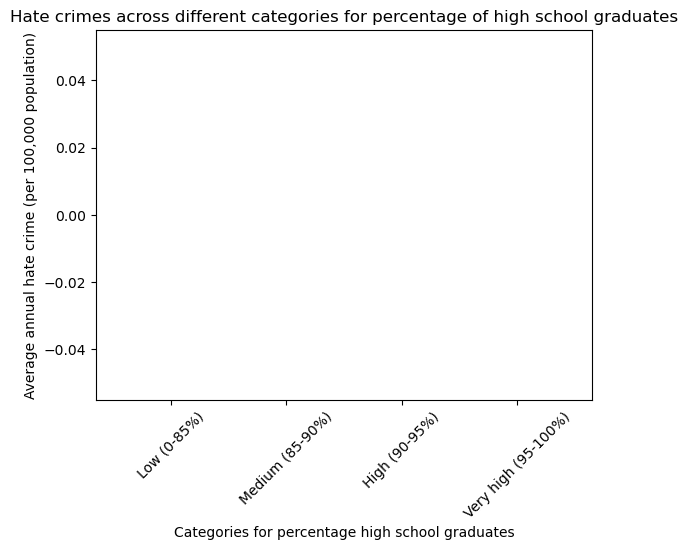

2 of 2 tests passed


In [5]:
@typecheck
def display_bar_chart(loshc: List[StateHateCrime], categories: List[EducationCategory]) -> None:
    """
    display a bar chart showing the average hate crime stats for each category of high school degree share.
    Categories are based on percentage of people with high school degree: low(0-85), med(85-90), high(90-95), and very high(95-100).
    """
    # return None #stub
    # Template based on visualization
    
    # the width of each bar
    bar_width = 9

    # set opacity of bars
    opacity = 0.8

    # finds the averages of all categories
    averages = avg_of_categories(loshc, categories)
    
    # the middle coordinate for each of the bars for the bar chart
    # we want to space them every 10 pixels, since we used a bar width of 9.
    middle_of_bars = produce_num_sequence(categories, 5, bar_width + 1)

    # create the first bar chart
    rects1 = plt.bar(middle_of_bars, 
                     averages,                         # list containing the height for each bar, here the means
                     bar_width,
                     alpha=opacity,                 # set the opacity
                     color='g')                     # set the colour (here, blue)

    # set the labels for the x-axis, y-axis, and plot title
    plt.xlabel('Categories for percentage high school graduates')
    plt.ylabel('Average annual hate crime (per 100,000 population)')
    plt.title('Hate crimes across different categories for percentage of high school graduates')

    # set the range for the axes
    # [x-min, x-max, y-min, y-max]
    # plt.axis([0,79,0,100])
    
    # set the x-coordinate for positioning the labels. Here, we want each label to be in the middle of each bar
    x_coord_labels = middle_of_bars
    
    # set the labels for each 'tick' on the x-axis
    tick_labels = produce_category_labels(categories)
    
    plt.xticks(ticks=x_coord_labels, labels=tick_labels, rotation=45)
    
    # show the plot
    plt.show()
    
    return None


start_testing()
# produce a graph with 2 bars at Low (with height of 2.1) and Medium (with height of 1.1).
expect(display_bar_chart(LOSHC1, LOEC1), None)

# produce an empty graph
expect(display_bar_chart(LOSHC0, LOEC1), None)
summary()

<font color="blue">
    read and main function, as well as the example tests.
</font>

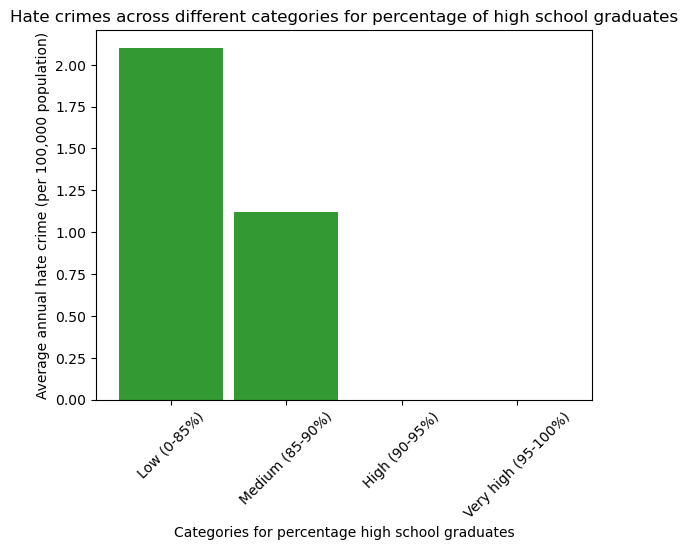

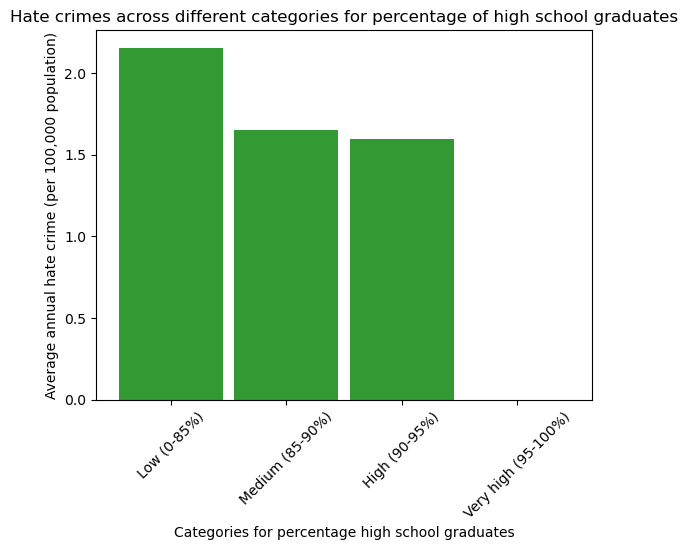

2 of 2 tests passed
2 of 2 tests passed


In [6]:
###########
# Functions

# categories for the possible categories.
categories = [EducationCategory.low, EducationCategory.med, EducationCategory.high, EducationCategory.very_high]

@typecheck
def main(filename: str, loec: List[EducationCategory]) -> None:
    """
    Reads the file from given filename, 
    analyzes the data and finds the average of hate crime for each categories for percentage of people with high school degree, 
    returns the result as a bar graph, with categories of low, medium, high, and very high.
    """
    # Template from HtDAP, based on function composition and additional parameter
    return display_bar_chart(read(filename), loec)
    
    

@typecheck
def read(filename: str) -> List[StateHateCrime]:
    """    
    reads information from the specified file and returns a list of State with statistics on hate crime and high school degree
    """
    #return []  #stub
    # Template from HtDAP
    # lochc contains the result so far
    loshc = [] # type: List[StateHateCrime]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            shc = StateHateCrime(row[0], parse_float(row[11]), parse_float(row[4]), high_school_share_category(parse_float(row[4])))
            loshc.append(shc)
    
    return loshc


# Examples and tests for main
start_testing()

#Test1: hate_crimes_test1.csv
# x-axis: "Categories of percentage of people with high school degree" and y-axis: "Average annual hate crime (per 100,000 population)"
# title: "Hate crimes across different categories of population with high school degrees"
# produce a bar graph with 2 bars (low, and medium), with Height of low (at around 2.1) higher than medium (at around 1.1)
expect(main("hate_crimes_test1.csv", categories), None)

#Test2: hate_crimes_test2.csv
# x-axis: "Categories of percentage of people with high school degree" and y-axis: "Average annual hate crime (per 100,000 population)"
# title: "Hate crimes across different categories of population with high school degrees"
# produce a bar graph with 3 bars (low, medium, and high), with Height of low (at around 2.1) higher than medium (at around 1.6), with high categories
# at lower height (at around 1.5)
expect(main("hate_crimes_test2.csv", categories), None)
summary()


# Examples and tests for read
start_testing()
expect(read("hate_crimes_test1.csv"), LOSHC1)
expect(read("hate_crimes_test2.csv"), [StateHateCrime('Alabama', 1.806410489, 0.821, EducationCategory.low),
                                       StateHateCrime('Illinois',1.044015798, 0.864, EducationCategory.med),
                                       StateHateCrime('Indiana', 1.757356567, 0.866, EducationCategory.med),
                                       StateHateCrime('Iowa', 0.561395565, 0.914, EducationCategory.high),
                                       StateHateCrime('Kansas', 2.143986672, 0.897, EducationCategory.med),
                                       StateHateCrime('Kentucky', 4.207889621, 0.817, EducationCategory.low),
                                       StateHateCrime('Louisiana', 1.341169554, 0.822, EducationCategory.low),
                                       StateHateCrime('Maine', 2.626610924, 0.902, EducationCategory.high),
                                       StateHateCrime('North Carolina', 1.262679796, 0.843, EducationCategory.low)])
summary()

### Final Graph/Chart

Now that everything is working, you **must** call `main` on the intended information source in order to display the final graph/chart:

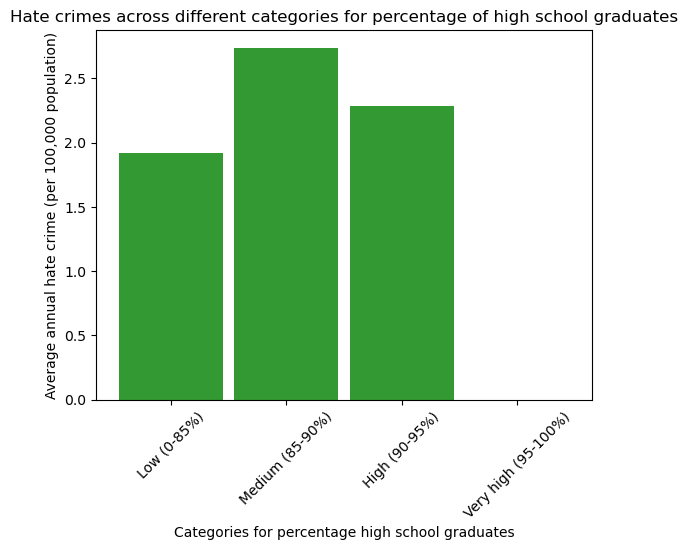

In [7]:
main("hate_crimes_clean.csv", categories)

In [8]:
# Be sure to select ALL THE FILES YOU NEED (including csv's) 
# when you submit. As usual, you cannot edit this cell.
# Instead, run this cell to start the submission process.
from cs103 import submit

COURSE = 130118
# Uncomment the ASSIGNMENT row for your section
ASSIGNMENT = 1740562 #if you are in section 201
# ASSIGNMENT = 1788053 #if you are in section 202

submit(COURSE, ASSIGNMENT)

# If your submission fails, SUBMIT by downloading your files and uploading them 
# to Canvas. You can learn how on the page "How to submit your Jupyter notebook" 
# on our Canvas site.

Valid(value=True, description='Token')

SelectMultiple(description='Files', index=(0,), layout=Layout(height='100%', width='50%'), options=('project_f…

Button(description='submit', icon='check', style=ButtonStyle(), tooltip='submit')

# Please double check your submission on Canvas to ensure that the right files (Jupyter file + CSVs) have been submitted and that the files do not contain unexpected errors.

<font color="red">**You should always check your submission on Canvas. It is your responsibility to ensure that the correct file has been submitted for grading.**</font> Regrade or accomodation requests using reasoning such as "I didn't realize I submitted the wrong file"/"I didn't realize the submission didn't work"/"I didn't realize I didn't save before submitting so some of my work is missing" will not be considered.